In [2]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
# -*- coding: utf-8 -*-
"""Untitled10.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1KznU35lgSDu1tt9-n3x6suRQ_TBULimf
"""

!pip install gensim

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

sentences = [
    "T am learning natural language processing",
    "Natural language processing is paert of machine learning",
    "I enjoy machine learning",
    "I also enjoy deep learning",
    "Deep learning uses neural networks",
    "Neural networks is powerful for natural language processing"
]

# Tokenize
tokenized_sentences = [word_tokenize(s.lower()) for s in sentences]

print(tokenized_sentences)



from gensim.models import Word2Vec

model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,   # embedding size
    window=3,          # context window
    min_count=1        # keep all words
)

print(model.wv.similarity("machine","learning"))

print(model.wv.similarity("learning","deep"))

print(model.wv.most_similar("learning"))

print("Top 5 similar words to machine:")
print(model.wv.most_similar("machine", topn = 5))

# Word2Vec is:
# Shallow neural network
# Only one hidden layer
# Trained using context prediction
# Using Pretrained Embeddings;

import gensim.downloader as api

print("Loading pretrainer model:")
# model = api.load("word2vec-google-news-300")
model = api.load("glove-wiki-gigaword-100")

import gensim.downloader as api

print("Loading pretrainer model:")
model = api.load("word2vec-google-news-300")
# model = api.load("glove-wiki-gigaword-100")

model.similarity("car","bus")

model.most_similar("machine")

#//wrd2vec predective model
#glove is stastistical odel using global data

[['t', 'am', 'learning', 'natural', 'language', 'processing'], ['natural', 'language', 'processing', 'is', 'paert', 'of', 'machine', 'learning'], ['i', 'enjoy', 'machine', 'learning'], ['i', 'also', 'enjoy', 'deep', 'learning'], ['deep', 'learning', 'uses', 'neural', 'networks'], ['neural', 'networks', 'is', 'powerful', 'for', 'natural', 'language', 'processing']]
0.2161361
0.01612643
[('paert', 0.21883177757263184), ('machine', 0.2161361277103424), ('powerful', 0.0932469293475151), ('enjoy', 0.09290042519569397), ('for', 0.07981367409229279), ('is', 0.06283949315547943), ('of', 0.05434546247124672), ('i', 0.027109606191515923), ('deep', 0.016126414760947227), ('processing', -0.010746493935585022)]
Top 5 similar words to machine:
[('learning', 0.21613609790802002), ('i', 0.04466790705919266), ('t', 0.02019743248820305), ('is', 0.015002330765128136), ('of', 0.010695204138755798)]
Loading pretrainer model:
Loading pretrainer model:


[('machines', 0.7677488327026367),
 ('wringer_washing', 0.5941920280456543),
 ('machinery', 0.5260838866233826),
 ('Automated_teller', 0.5225658416748047),
 ('roundish_pinhole_shape', 0.5103495121002197),
 ('Machine', 0.5063987374305725),
 ('extrude_liquefied_cornmeal', 0.5044564604759216),
 ('ma_chine', 0.4988497793674469),
 ('CNC_lathe', 0.4958512485027313),
 ('Computer_Numerically_Controlled', 0.4957743287086487)]

In [5]:
#Nlp -visualizing embeddings

In [6]:
# We are supposed to reduce dimension from 100D -> 2D
# This will let us visiually see:
# 1. similar words clustered together
# 2. Opposite words separate

# How we are going to reduce Dimensions ?
"""
we will use Dimensionality Reduction:
_ Reduction the number of features while preserving important information

We convert:
10000=>1000
100=>10

Why we need to do that?
To solve Problem of curse of dimensionality
Types of dimensionality redun
1)feature selection: remove some useless colmns
2)feature extraction: create new feature from existing colmns

PCA-combine features:
find the dirn where data varies most
these dirns=principal components
instead of original features

Suppose user:
height and weight are correlated
Instead of 2 features - pca cretae one new single feature reprsentating both.

How PCA  works?
1. Standardize data
2. Conpute covariance matrix
3. Find eigenvectors
4. Select top components
5. Project data

Suppose we want 2 components:
PC1 -> most information
PC2 -> second most


limitation of pca
1.linear only
2.cannot capture comples shapes

T-SNE - t-distributed stochastic neighbor embedding
it preserve:
local structure (neighbors)
points close in high-dim -> close in low-dim
It converts distances -> probabilities
use kl divergence
"""



'\nwe will use Dimensionality Reduction:\n_ Reduction the number of features while preserving important information\n\nWe convert:\n10000=>1000\n100=>10\n\nWhy we need to do that?\nTo solve Problem of curse of dimensionality\nTypes of dimensionality redun\n1)feature selection: remove some useless colmns\n2)feature extraction: create new feature from existing colmns\n\nPCA-combine features:\nfind the dirn where data varies most\nthese dirns=principal components\ninstead of original features\n\nSuppose user:\nheight and weight are correlated\nInstead of 2 features - pca cretae one new single feature reprsentating both.\n\nHow PCA  works?\n1. Standardize data\n2. Conpute covariance matrix\n3. Find eigenvectors\n4. Select top components\n5. Project data\n\nSuppose we want 2 components:\nPC1 -> most information\nPC2 -> second most\n\n\nlimitation of pca\n1.linear only\n2.cannot capture comples shapes\n\nT-SNE - t-distributed stochastic neighbor embedding\nit preserve:\nlocal structure (neig

In [7]:
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [8]:
model=api.load("glove-wiki-gigaword-100")
print("loaded...")

loaded...


In [17]:
words = [
    "king","queen","man","woman",
    "dog","cat","animal",
    "car","truck","bus", "vehicle",
    "happy","sad","joy","anger"
]

In [18]:
vectors=[model[word] for word in words]

In [19]:
vectors[0].shape

(100,)

In [20]:
pca=PCA(n_components=2)
reduced=pca.fit_transform(vectors)


In [21]:
reduced.shape

(15, 2)

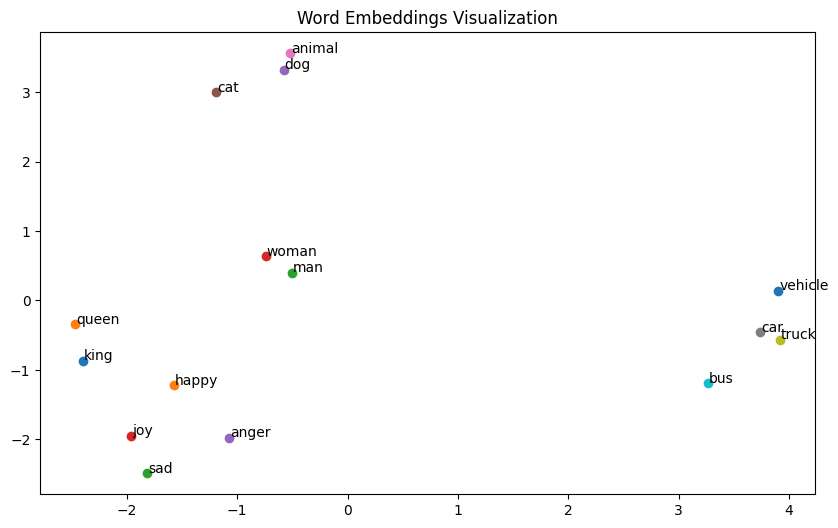

In [23]:
plt.figure(figsize=(10,6))
for i,word in enumerate(words):
    x=reduced[i][0]
    y=reduced[i][1]
    plt.scatter(x,y)
    plt.text(x+0.01,y+0.01,word)
plt.title("Word Embeddings Visualization")
plt.show()

In [24]:
from sklearn.manifold import TSNE
import numpy as np

In [25]:
vectors = np.array([model[word] for word in words])

In [27]:
tsne=TSNE(n_components=2 , perplexity=2)
reduced=tsne.fit_transform(vectors)

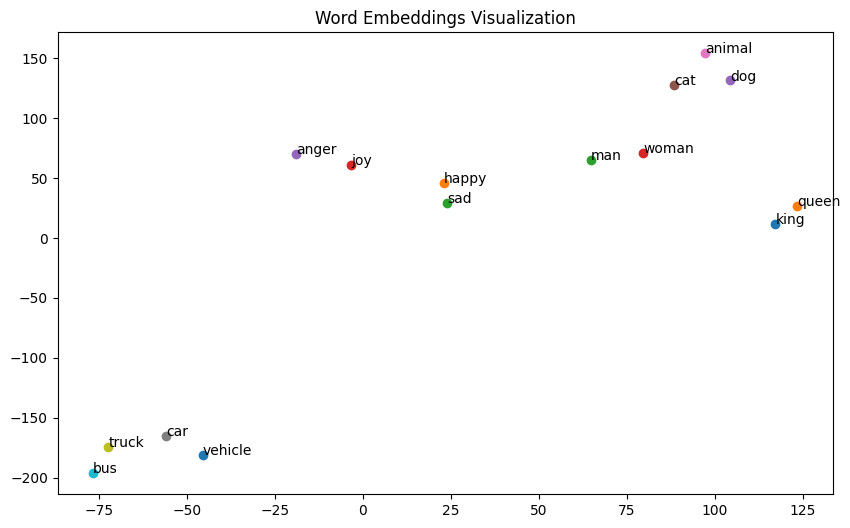

In [28]:
plt.figure(figsize=(10,6))
for i,word in enumerate(words):
    x=reduced[i][0]
    y=reduced[i][1]
    plt.scatter(x,y)
    plt.text(x+0.01,y+0.01,word)
plt.title("Word Embeddings Visualization")
plt.show()